# 挖掘建模

经过数据探索和数据预处理，得到了可以直接建模的数据。根据数据挖掘目标和数据形式可以建立分类与预测、聚类分析、关联分析、时序模式和偏差检测等模型，帮助企业提取数据中蕴含的商业价值，提高企业的竞争力。

## 分类与预测

分类和预测是预测问题的两种主要类型
- 分类主要是预测分类标号
- 预测主要是建立连续值函数模型，预测给定自变量对应的因变量的值

### 常见的分类与预测算法

- 回归分析
    - 线性回归
    - 非线性回归
    - Logistic回归
    - 岭回归
    - 主成分回归
    - 偏最小二乘回归
- 决策树
- 人工神经网络
- 贝叶斯网络
- 支持向量机

### 回归分析

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression

In [3]:
# 导入数据集
filename = './data/data_5/bankloan.xls'
data = pd.read_excel(filename)

# 准备数据
X = data.drop('违约', axis=1).values
y = data['违约'].values

In [4]:
# 无特征选择的建模
lr = LogisticRegression(solver='liblinear').fit(X, y)
print('模型的平均正确率为：{}'.format(lr.score(X, y)))

模型的平均正确率为：0.8057142857142857


In [5]:
# 特征选择
features = data.columns[:-1].copy()
rlr = RandomizedLogisticRegression().fit(X, y)
print('特征得分为：{}'.format(rlr.scores_))
print('特征选择结果为：{}'.format(rlr.get_support()))
print('选择的有效特征为： {}'.format(features[rlr.get_support()].values))
X = data[features[rlr.get_support()]].values
print('特征选择后数据集的形状为：{}'.format(X.shape))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-pa

特征得分为：[0.085 0.085 0.995 0.395 0.    1.    0.545 0.05 ]
特征选择结果为：[False False  True  True False  True  True False]
选择的有效特征为： ['工龄' '地址' '负债率' '信用卡负债']
特征选择后数据集的形状为：(700, 4)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, cat

In [6]:
# 特征选择后的建模
lr = LogisticRegression().fit(X, y)
print('模型的平均正确率为：{}'.format(lr.score(X, y)))

模型的平均正确率为：0.8142857142857143


特征选择方法：
- 递归特征消除
- 稳定性选择

**Logistic回归本质上是一种线性模型，这里的有效性检验本质上还是一种线性相关检验，因此筛选出来的变量只是与结果具有较强的线性相关性，变量没有被保留，也只是因为没有明显的线性相关性，但是可能存在一些非线性的关系，实际操作中需要根据问题的背景对筛选结果进行分析。**

对于非线性关系的变量筛选方法有决策树、神经网络等。

### 决策树

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
filename = './data/data_5/sales_data.xls'
data = pd.read_excel(filename, index_col='序号')

data[data == '好'] = 1
data[data == '是'] = 1
data[data == '高'] = 1
data[data != 1] = -1
data = data.astype(int)

X = data.drop('销量', axis=1).values
y = data['销量'].values

dtc = DecisionTreeClassifier(criterion='entropy').fit(X, y)

In [9]:
from sklearn.tree import export_graphviz

In [10]:
with open('./data/data_5/tree.dot', 'w') as f:
    f = export_graphviz(dtc, feature_names=data.columns[:-1].copy().values, out_file=f)

### 人工神经网络

In [11]:
filename = './data/data_5/sales_data.xls'
data = pd.read_excel(filename, index_col='序号')

data[data == '好'] = 1
data[data == '是'] = 1
data[data == '高'] = 1
data[data != 1] = -1
data = data.astype(int)

X = data.drop('销量', axis=1).values
y = data['销量'].values

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', class_mode='binary', metrics=['accuracy'])

model.fit(X, y, nb_epoch=10, batch_size=1000)
yp = model.predict_classes(X).reshape(len(y))

from sklearn.metrics import confusion_matrix
confusion_matrix(y, yp)

Using TensorFlow backend.
W0801 12:15:49.068238  5360 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 12:15:49.109863  5360 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 12:15:49.144805  5360 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 12:15:49.148764  5360 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 12:15:49.202646  5360 deprecation_wrapper.py:119

Epoch 1/10
34/34 [==============================] - 1s 17ms/step - loss: 1.1034 - acc: 0.5000
Epoch 2/10
34/34 [==============================] - 0s 91us/step - loss: 1.0990 - acc: 0.5000
Epoch 3/10
34/34 [==============================] - 0s 117us/step - loss: 1.0952 - acc: 0.5000
Epoch 4/10
34/34 [==============================] - 0s 108us/step - loss: 1.0913 - acc: 0.5000
Epoch 5/10
34/34 [==============================] - 0s 52us/step - loss: 1.0872 - acc: 0.5000
Epoch 6/10
34/34 [==============================] - 0s 65us/step - loss: 1.0831 - acc: 0.5000
Epoch 7/10
34/34 [==============================] - 0s 65us/step - loss: 1.0789 - acc: 0.5000
Epoch 8/10
34/34 [==============================] - 0s 87us/step - loss: 1.0746 - acc: 0.5000
Epoch 9/10
34/34 [==============================] - 0s 59us/step - loss: 1.0704 - acc: 0.5000
Epoch 10/10
34/34 [==============================] - 0s 38us/step - loss: 1.0662 - acc: 0.5000


array([[ 0,  0, 16],
       [ 0,  0,  0],
       [ 0,  1, 17]], dtype=int64)

### 分类与预测算法评价

- 绝对误差与相对误差
- 平均绝对误差
- 均方误差
- 均方根误差
- 平均绝对百分误差
- Kappa统计
- 识别准确率（accuracy）
- 识别精确率（Precision）
- 识别反馈率（Recall）
- ROC曲线（Sencitivity(Recall) - (1-Specificity)）
- 混淆矩阵

## 聚类分析

聚类的输入是一组未被标记的样本，聚类根据数据之间的距离或者相似度将其划分为若干组，划分的原则是组内距离最小化而组间距离最大化。

- K-Means
- K-中心点
- 系统聚类

### K-Means聚类算法

- 对于连续属性，要先对各属性值进行零-均值规范
- 对于文档数据间的相似度，使用余弦相似性
- 对于不同的聚类结果，选择误差平方和（各个点到所属簇中心点的距离平方和）较小的一个

In [13]:
inputfile = './data/data_5/consumption_data.xls'
k = 3
iteration = 500
data = pd.read_excel(inputfile, index_col='Id')
data_zc = 1.0 * (data - data.mean()) / data.std()

from sklearn.cluster import KMeans

model = KMeans(n_clusters=k, max_iter=iteration).fit(data_zc)

In [14]:
model.cluster_centers_

array([[-0.16045063,  1.11480154,  0.39284443],
       [ 3.45505486, -0.29565357,  0.44912342],
       [-0.14935336, -0.65889299, -0.27177977]])

In [15]:
model.labels_[:20]

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2])

In [16]:
data['类别'] = model.labels_
data.head()

,R,F,M,类别
Id,,,,
1,27,6,232.61,2
2,3,5,1507.11,2
3,4,16,817.62,0
4,3,11,232.81,2
5,14,7,1913.05,2


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

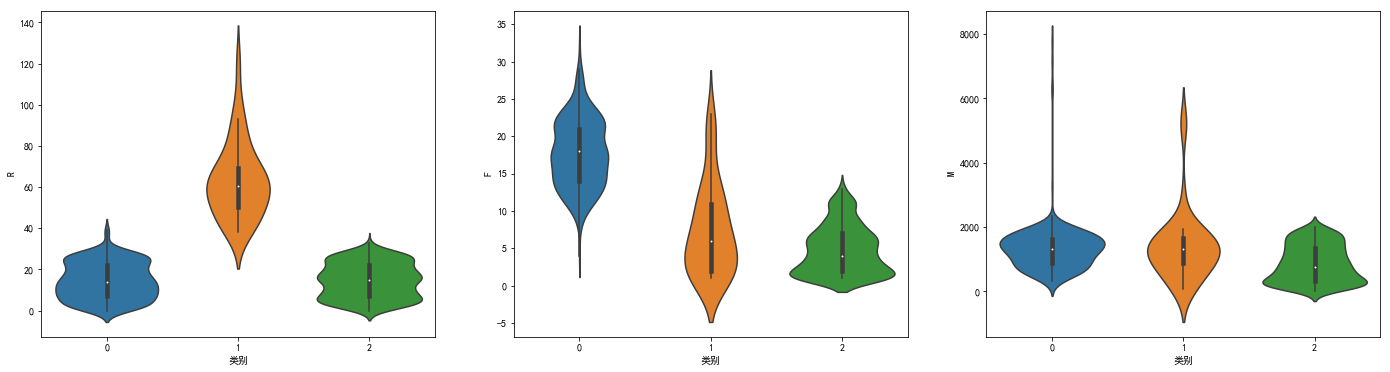

In [18]:
plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.violinplot(data=data, y=data.columns[i], x='类别')

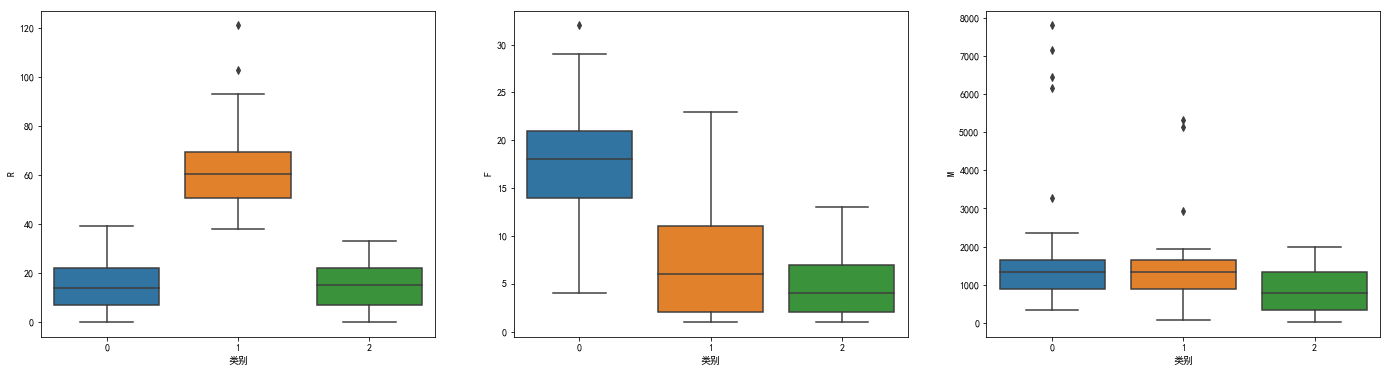

In [19]:
plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=data, y=data.columns[i], x='类别')

### 聚类分析算法评价

- purity评价法
- RI评价法
- F值评价法

### Python主要聚类分析算法

sklearn.cluster
- KMeans：K均值聚类
- AffinityPropagation：吸引力传播聚类，几乎优于所有其他方法，不需要指定聚类数，但是运行效率低
- MeanShift：均值漂移聚类算法
- SpectralClustering：谱聚类，效果比K均值好，速度比K均值快
- AgglomerativeClustering：层次聚类，给出一棵聚类层次树
- DBSCAN：具有噪声的基于密度的聚类方法
- BIRCH：综合的层次聚类算法，可以处理大规模数据的聚类

### TSNE - 聚类结果可视化工具

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE().fit_transform(data_zc)
tsne = pd.DataFrame(tsne, index=data_zc.index)
tsne['class'] = model.labels_
tsne.head()

,0,1,class
Id,,,
1,-21.632883,17.696987,2
2,24.277725,13.284489,2
3,-22.057125,-21.153313,0
4,-25.510534,-13.651853,2
5,18.567717,0.140933,2


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_palette('muted')
sns.set_style('ticks')

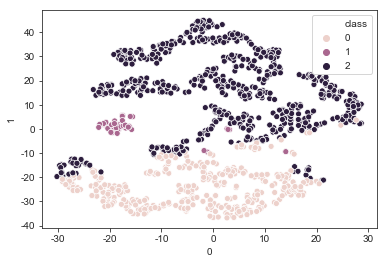

In [23]:
sns.scatterplot(data=tsne, x=0, y=1, hue='class')

## 关联规则

关联规则是数据挖掘中使用最多的研究方法之一，目的是在一个数据集中找出各项之间的关联关系，而这种关系并没有在数据中直接表示出来。

In [24]:
inputfile = './data/data_5/menu_orders.xls'
data = pd.read_excel(inputfile, header=None)

In [25]:
import numpy as np

In [26]:
from itertools import permutations

In [27]:
def count_comb(d, comb):
    count = 0
    for i in range(len(data)):
        l = data.iloc[i].values.tolist()
        bol = 1
        for item in comb:
            tmp_bol = int(item in l)
            bol = bol * tmp_bol
        if bol:
            count += 1
    return count

def cal_confidence(results, tmp_results, comb):
    up = tmp_results[tmp_results.rule == comb]['support']
    down = results[results.rule == comb[:-1]]['support']
    result = float(up.iloc[0]/down.iloc[0])
    return result

def apriori(d, min_support=0.2, min_confidence=0.5, label='-'):
    all_items = list(pd.unique(data.values.flatten()))
    all_items.remove(np.nan)
    total_len = len(all_items)
    k = 0
    noneed = []
    results = pd.DataFrame(columns=['rule', 'support', 'confidence'])
    while k <= total_len:
        k += 1
        all_combs = list(permutations(all_items, k))
        good_combs = [i for i in all_combs if i[:-1] not in noneed]
        bad_combs = [i for i in all_combs if i[:-1] in noneed]
        tmp_results = pd.DataFrame(columns=results.columns)
        tmp_results['rule'] = good_combs
        tmp_results['support'] = tmp_results.rule.apply(lambda x: count_comb(data, x)) / len(d)
        if k == 1:
            tmp_results['confidence'] = 1
        else:
            tmp_results['confidence'] = tmp_results.rule.apply(lambda x: cal_confidence(results, tmp_results, x))
        no_good = tmp_results[(tmp_results.support < min_support) | (tmp_results.confidence < min_confidence)].copy()
        bad_combs.extend(no_good['rule'].values.tolist())
        noneed.extend(bad_combs)
        tmp_results = tmp_results.drop(no_good.index)
        results = results.append(tmp_results)
    results['rule'] = results.rule.apply(lambda x: label.join(x))
    results = results[results.rule.str.len() > 1]
    return results.sort_values('confidence', ascending=False).reset_index(drop=True)

In [28]:
results = apriori(data)

results

,rule,support,confidence
0,e-a,0.3,1
1,e-c,0.3,1
2,d-b,0.2,1
3,e-c-a,0.3,1
4,e-a-c,0.3,1
5,a-c,0.5,0.714286
6,c-a,0.5,0.714286
7,c-b,0.5,0.714286
8,a-b,0.5,0.714286
9,b-a,0.5,0.625


## 时序模式

就餐饮企业而言，由于生产和销售是同时进行的，因此销售预测对于餐饮企业十分必要。如何基于菜品历史销售数据，做好餐饮销售预测，以便减少菜品脱销或者生产延误的情况，从而减少菜品生产等待时间，提供给客户更优质的服务。

### 时间序列的预处理

拿到一个观察值序列后，首先要对它的纯随机性和平稳性进行检验，根据检验结果可以将序列分为不同的类型，对不同类型的序列采取不同的处理方法。

- 纯随机序列（白噪声序列）：放弃分析
- 平稳非白噪声序列：通常建立线性模型分析（如ARMA）
- 非平稳序列：一般转换为平稳序列进行分析

**平稳序列**：

如果时间序列在某一常数附近波动且波动范围有限，即有常数均值和常数方差，并且延迟k期的序列变量的自协方差和自相关系数是相等的，或者说延迟k期的序列变量之间的影响程度是一样的，则称这个序列为平稳序列。

**平稳性的检验**
- 时序图检验：平稳序列的时序图通常显示序列值在一个常数附近随机波动，而且波动的范围有界， 如果有明显的趋势性或者周期性，那么它通常不是平稳序列；缺点：带有主观性
- 自相关图检验：平稳序列只具有短期相关性，间隔越远的过去值对现在值的影响越小，随着延迟周期k的增加，自相关系数会比较快地趋向于0，并在0附近随机波动，非平稳序列的自相关系数衰减较慢
- 单位根检验：检验序列中是否存在单位根，如果存在单位根，那么就是非平稳序列

**纯随机性检验（白噪声检验）**

### 平稳时间序列分析

- AR模型：在t时刻的随机变量X的取值是前p期X取值的多元线性回归
- MA模型：在t时刻的随机变量X的取值是均值加上前p期随机扰动值的多元线性回归
- ARMA模型：在t时刻的随机变量X的取值是前p期X取值和前q期随机扰动值的共同的多元线性回归

## 离群点检测

离群点检测是数据挖掘中重要的一部分，它的任务是发现于大部分其他对象显著不同的对象。

大部分数据挖掘算法将这种差异信息视为噪声而丢弃，然而在一些应用中，罕见的数据可能蕴含着更大的研究价值。

**常见的离群点检测方法：**
- 基于统计：必须知道数据服从什么分布，对于高维数据效果很差
- 基于邻近度：二维或三维的数据可以用散点图观察，大数据集不适用，对参数选择敏感，具有全局阈值，不适用于具有不同密度区域的数据集
- 基于密度：一个对象的离群度得分是该对象周围的点密度的逆，能够处理不同的密度区域，不适用于大数据集，参数选择困难
- 基于聚类：聚类算法产生簇的质量对于产生离群点的质量影响很大
    - 丢弃远离其他簇的小簇
    - 首先聚类所有对象，然后评估对象属于簇的程度（离群点得分）

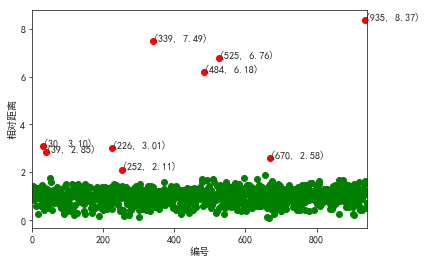

In [43]:
import numpy as np
import pandas as pd

inputfile = './data/data_5/consumption_data.xls'
k = 3
threshold = 2
iteration = 500
data = pd.read_excel(inputfile, index_col='Id')
data_zs = 1.0 * (data - data.mean()) / data.std()

from sklearn.cluster import KMeans

model = KMeans(n_clusters=k, max_iter=iteration).fit(data_zs)

r = pd.concat([data_zs, pd.Series(model.labels_, index=data_zs.index)], axis=1)
r.columns = list(data.columns) + ['聚类类别']

norm = []
for i in range(k):
    norm_tmp = r[['R', 'F', 'M']][r['聚类类别']==i] - model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm, axis=1)
    norm.append(norm_tmp / norm_tmp.median())

norm = pd.concat(norm)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

norm[norm <= threshold].plot(style='go')
discrete_points = norm[norm > threshold]
discrete_points.plot(style='ro')

for i in range(len(discrete_points)):
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)'%(id, n), xy=(id, n), xytext=(id, n))

plt.xlabel('编号')
plt.ylabel('相对距离')
plt.show()